In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 [======>.......................] - ETA: 1s - loss: 2.0354 - accuracy: 0.1094
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 1s 146ms/step - loss: 2.0592 - accuracy: 0.0962 - val_loss: 1.9215 - val_accuracy: 0.0419
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.9650 - accuracy: 0.1016
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 74ms/step - loss: 1.9970 - accuracy: 0.0942 - val_loss: 1.8600 - val_accuracy: 0.0539
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.9255 - accuracy: 0.1016
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 29ms/step - loss: 1.9242 - accuracy: 0.1042 - val_loss: 1.8126 - val_accuracy: 0.1557
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.8511 - accuracy: 0.1172
Epoch 4: sa

4/4 [==============================] - 0s 18ms/step - loss: 1.4834 - accuracy: 0.3547 - val_loss: 1.4355 - val_accuracy: 0.2814
Epoch 29/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.5294 - accuracy: 0.3672
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 1.4765 - accuracy: 0.3868 - val_loss: 1.4211 - val_accuracy: 0.2934
Epoch 30/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.4587 - accuracy: 0.4141
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 20ms/step - loss: 1.4654 - accuracy: 0.4048 - val_loss: 1.4050 - val_accuracy: 0.3413
Epoch 31/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.4981 - accuracy: 0.3203
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 1.4666 - accuracy: 0.3828 - val_loss: 1.

Epoch 56/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1700 - accuracy: 0.4844
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 1.1367 - accuracy: 0.5251 - val_loss: 0.9430 - val_accuracy: 0.7545
Epoch 57/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1377 - accuracy: 0.4922
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 1.1295 - accuracy: 0.5110 - val_loss: 0.9290 - val_accuracy: 0.7725
Epoch 58/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1041 - accuracy: 0.5391
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 1.1151 - accuracy: 0.5190 - val_loss: 0.9175 - val_accuracy: 0.7725
Epoch 59/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1016 - accuracy: 0.5703
Epoch

1/4 [======>.......................] - ETA: 0s - loss: 1.0162 - accuracy: 0.5625
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.9602 - accuracy: 0.6092 - val_loss: 0.6996 - val_accuracy: 0.8204
Epoch 84/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.9680 - accuracy: 0.6016
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 0.9485 - accuracy: 0.6232 - val_loss: 0.6940 - val_accuracy: 0.8024
Epoch 85/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8814 - accuracy: 0.6641
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.9589 - accuracy: 0.6152 - val_loss: 0.6876 - val_accuracy: 0.7904
Epoch 86/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.9668 - accuracy: 0.5859
Epoch 86: saving mo

1/4 [======>.......................] - ETA: 0s - loss: 0.8805 - accuracy: 0.6719
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.8690 - accuracy: 0.6553 - val_loss: 0.5790 - val_accuracy: 0.8683
Epoch 111/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8955 - accuracy: 0.6641
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.8768 - accuracy: 0.6473 - val_loss: 0.5782 - val_accuracy: 0.8743
Epoch 112/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7587 - accuracy: 0.6875
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.7916 - accuracy: 0.6593 - val_loss: 0.5765 - val_accuracy: 0.8743
Epoch 113/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8627 - accuracy: 0.6641
Epoch 113: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.8098 - accuracy: 0.6406
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.7888 - accuracy: 0.6673 - val_loss: 0.5016 - val_accuracy: 0.9341
Epoch 138/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7545 - accuracy: 0.6484
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.7508 - accuracy: 0.6794 - val_loss: 0.4994 - val_accuracy: 0.9341
Epoch 139/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8889 - accuracy: 0.6172
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.7539 - accuracy: 0.6954 - val_loss: 0.4975 - val_accuracy: 0.9341
Epoch 140/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7920 - accuracy: 0.6562
Epoch 140: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7266 - accuracy: 0.6875
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.6948 - accuracy: 0.6974 - val_loss: 0.4383 - val_accuracy: 0.9581
Epoch 165/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6301 - accuracy: 0.7344
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.7263 - accuracy: 0.6934 - val_loss: 0.4369 - val_accuracy: 0.9581
Epoch 166/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6919 - accuracy: 0.7344
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 0.7788 - accuracy: 0.6994 - val_loss: 0.4363 - val_accuracy: 0.9581
Epoch 167/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8219 - accuracy: 0.6641
Epoch 167: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.6061 - accuracy: 0.7578
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.7128 - accuracy: 0.7234 - val_loss: 0.3807 - val_accuracy: 0.9820
Epoch 192/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7394 - accuracy: 0.6797
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.7160 - accuracy: 0.6994 - val_loss: 0.3823 - val_accuracy: 0.9880
Epoch 193/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7636 - accuracy: 0.6875
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.7151 - accuracy: 0.7255 - val_loss: 0.3822 - val_accuracy: 0.9820
Epoch 194/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6977 - accuracy: 0.7578
Epoch 194: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.5857 - accuracy: 0.7656
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 0.6309 - accuracy: 0.7535 - val_loss: 0.3340 - val_accuracy: 0.9940
Epoch 219/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7100 - accuracy: 0.7422
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.6154 - accuracy: 0.7575 - val_loss: 0.3324 - val_accuracy: 0.9940
Epoch 220/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6803 - accuracy: 0.7266
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 0.6441 - accuracy: 0.7555 - val_loss: 0.3331 - val_accuracy: 0.9940
Epoch 221/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6754 - accuracy: 0.7344
Epoch 221: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.5988 - accuracy: 0.7891
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.6138 - accuracy: 0.7715 - val_loss: 0.2837 - val_accuracy: 1.0000
Epoch 246/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7735 - accuracy: 0.6797
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.7052 - accuracy: 0.7174 - val_loss: 0.2843 - val_accuracy: 1.0000
Epoch 247/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6820 - accuracy: 0.7422
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.6100 - accuracy: 0.7595 - val_loss: 0.2874 - val_accuracy: 1.0000
Epoch 248/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6670 - accuracy: 0.7188
Epoch 248: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.5311 - accuracy: 0.7656
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.5969 - accuracy: 0.7455 - val_loss: 0.2672 - val_accuracy: 1.0000
Epoch 273/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4971 - accuracy: 0.8203
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.5454 - accuracy: 0.7816 - val_loss: 0.2671 - val_accuracy: 1.0000
Epoch 274/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6298 - accuracy: 0.7969
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.5958 - accuracy: 0.7916 - val_loss: 0.2675 - val_accuracy: 1.0000
Epoch 275/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5422 - accuracy: 0.8047
Epoch 275: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.5157 - accuracy: 0.7656
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 0.5606 - accuracy: 0.7715 - val_loss: 0.2389 - val_accuracy: 1.0000
Epoch 300/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5612 - accuracy: 0.7578
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.5710 - accuracy: 0.8036 - val_loss: 0.2374 - val_accuracy: 1.0000
Epoch 301/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4993 - accuracy: 0.8203
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5493 - accuracy: 0.7896 - val_loss: 0.2371 - val_accuracy: 1.0000
Epoch 302/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7812
Epoch 302: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.5801 - accuracy: 0.7500
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 0.5289 - accuracy: 0.7956 - val_loss: 0.2208 - val_accuracy: 1.0000
Epoch 327/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4885 - accuracy: 0.8047
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.5349 - accuracy: 0.8076 - val_loss: 0.2136 - val_accuracy: 1.0000
Epoch 328/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6531 - accuracy: 0.7500
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 17ms/step - loss: 0.5488 - accuracy: 0.7916 - val_loss: 0.2122 - val_accuracy: 1.0000
Epoch 329/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4963 - accuracy: 0.8047
Epoch 329: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.4170 - accuracy: 0.8438
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 20ms/step - loss: 0.4690 - accuracy: 0.8176 - val_loss: 0.2145 - val_accuracy: 1.0000
Epoch 354/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.3778 - accuracy: 0.8672
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 20ms/step - loss: 0.4961 - accuracy: 0.8196 - val_loss: 0.2132 - val_accuracy: 1.0000
Epoch 355/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6006 - accuracy: 0.7812
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5594 - accuracy: 0.7876 - val_loss: 0.2117 - val_accuracy: 1.0000
Epoch 356/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4992 - accuracy: 0.7812
Epoch 356: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 1.0000


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.00910177 0.00075068 0.04710568 0.02630292 0.17365459 0.7430844 ]
5


# 混同行列

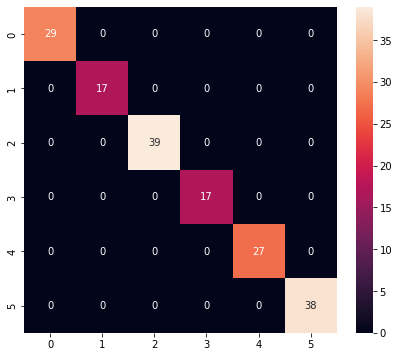

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        38

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Client\AppData\Local\Temp\tmpwv2o_1ep\assets


6496

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00910178 0.00075068 0.04710564 0.02630293 0.17365466 0.7430844 ]
5
